In [ ]:
from google.colab import drive
import pandas as pd
import re
import glob
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import glob

# Verificar archivos en la carpeta
archivos = glob.glob('/content/drive/MyDrive/TESIS /datos reservas/*.txt')
print("Archivos encontrados:", archivos)

Archivos encontrados: ['/content/drive/MyDrive/TESIS /datos reservas/01012023-30062023.txt', '/content/drive/MyDrive/TESIS /datos reservas/01012024-30062024.txt', '/content/drive/MyDrive/TESIS /datos reservas/01072022-31122022.txt', '/content/drive/MyDrive/TESIS /datos reservas/01072023-31122023.txt', '/content/drive/MyDrive/TESIS /datos reservas/01072024-31122024.txt', '/content/drive/MyDrive/TESIS /datos reservas/01012022-30062022.txt']


## Importación y Pre Limpieza de los Archivos

In [ ]:
# Revisar el contenido de un archivo de ejemplo
if archivos:
    with open(archivos[0], 'r') as f:
        contenido = f.read()
        print("Contenido del primer archivo:\n", contenido[:500])  # Muestra los primeros 500 caracteres
else:
    print("No se encontraron archivos en la carpeta especificada.")

Contenido del primer archivo:
 Arrival Date;01-01-23;TWTW;2;0;1;BMR;O;USD; 31.00;CKOT;;01-01-23;04-01-23;0524;Quinones,Ralph,Mr;25MRYE;;142804;71258101;;0524;12:45;;;10:47;;DUU;;Arrival Date;01-01-23;GENR;2;0;1;SDC;O;USD; 183.00;CKOT;;01-01-23;03-01-23;0407;Zimmermann,Ralph,Mr;43XMIA;;177126;88681625;;1127;12:47;;;12:14;;DUU;;Valid Rate ID Required (I2),Split reservation (S5),Early Check-In (E1);Member (MRD);Marriott Bonvoy;
Arrival Date;01-01-23;Sign room and tax only (S4),Breakfast included (B6);1 Queen Bed (Q2);QUEN;1;0;1;


In [ ]:
def procesar_archivos(ruta_carpeta):
    archivos = glob.glob(ruta_carpeta + '/*.txt')
    registros = []

    for archivo in archivos:
        with open(archivo, 'r') as f:
            contenido = f.read()

            # Dividir en registros donde cada uno comienza con "Arrival Date"
            # Esto creará una lista en la cual cada elemento es un registro completo
            filas = contenido.split("Arrival Date")

            # Procesar cada registro obtenido
            for fila in filas[1:]:  # Saltamos el primer elemento vacío
                # Agregamos "Arrival Date" de nuevo al inicio del registro
                registro_completo = "Arrival Date;" + fila.strip()  # Agregar ";" en caso de estar pegado
                columnas = registro_completo.split(';')
                registros.append(columnas)

    # Crear un DataFrame con los registros
    df = pd.DataFrame(registros)
    return df

In [ ]:
# Ruta de la carpeta en Google Drive donde están los archivos
ruta_carpeta = '/content/drive/MyDrive/TESIS /datos reservas/'
df = procesar_archivos(ruta_carpeta)

In [ ]:
print(df.head(3))

             0  1         2   \
0  Arrival Date     01-01-23   
1  Arrival Date     01-01-23   
2  Arrival Date     01-01-23   

                                                  3                 4     5   \
0                                               TWTW                 2     0   
1                                               GENR                 2     0   
2  Sign room and tax only (S4),Breakfast included...  1 Queen Bed (Q2)  QUEN   

  6    7  8    9   ...            31               32    33    34    35    36  \
0  1  BMR  O  USD  ...          None             None  None  None  None  None   
1  1  SDC  O  USD  ...  Member (MRD)  Marriott Bonvoy        None  None  None   
2  1    0  1  GCO  ...                                 None  None  None  None   

     37    38    39    40  
0  None  None  None  None  
1  None  None  None  None  
2  None  None  None  None  

[3 rows x 41 columns]


In [ ]:
df.iloc[14]

,14
0,Arrival Date
1,
2,01-01-23
3,GENR
4,2
5,0
6,1
7,BEN
8,O
9,USD


In [ ]:
columnas_seleccionadas = list(range(0, 16)) + [30, 31]
df_seleccionado = df.iloc[:, columnas_seleccionadas].copy()

In [ ]:
df_seleccionado.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,30,31
0,Arrival Date,,01-01-23,TWTW,2,0,1,BMR,O,USD,31.00,CKOT,,01-01-23,04-01-23,0524,,None
1,Arrival Date,,01-01-23,GENR,2,0,1,SDC,O,USD,183.00,CKOT,,01-01-23,03-01-23,0407,"Valid Rate ID Required (I2),Split reservation ...",Member (MRD)
2,Arrival Date,,01-01-23,"Sign room and tax only (S4),Breakfast included...",1 Queen Bed (Q2),QUEN,1,0,1,GCO,P,USD,50.00,CKOT,C- GOL LINHAS AEREAS,01-01-23,"BKFA,BKFP",
3,Arrival Date,,01-01-23,GENR,2,0,1,SDC,O,USD,183.00,CKOT,,01-01-23,03-01-23,0411,"Valid Rate ID Required (I2),Split reservation ...",Member (MRD)
4,Arrival Date,,01-01-23,GENR,1,0,1,BMR,O,USD,31.00,CKOT,T- AFFILIATE PHG/US,01-01-23,02-01-23,0508,"Non-Commissionable Rate (N4),Extra Towels (E6)...","High Floor Room (H1),1 King Bed (K1)"
5,Arrival Date,,01-01-23,GENR,1,0,1,BMR,O,USD,31.00,CKOT,T- AFFILIATE PHG/US,01-01-23,02-01-23,0511,"Non-Commissionable Rate (N4),Split reservation...",1 King Bed (K1)
6,Arrival Date,,01-01-23,GENR,1,0,1,BMR,O,USD,31.00,CKOT,T- AFFILIATE PHG/US,01-01-23,02-01-23,0512,"Non-Commissionable Rate (N4),Split reservation...",1 King Bed (K1)
7,Arrival Date,,01-01-23,GENR,2,0,1,BEN,O,USD,185.00,CKOT,T- AFFILIATE PHG/US,01-01-23,03-01-23,0728,Member Rate (M5),1 Twin bed (T6)
8,Arrival Date,,01-01-23,TWTW,2,0,1,BMR,O,USD,31.00,CKOT,,01-01-23,04-01-23,0524,"Non-Commissionable Rate (N4),Mobile Check-In (...",Silver Elite (SLR)
9,Arrival Date,,01-01-23,GENR,2,0,1,BEN,O,USD,205.00,CKOT,,01-01-23,02-01-23,0527,"Member Rate (M5),Member (Y1)",1 Twin bed (T6)


In [ ]:
nombres_columnas = [
    "Arrival Date", "None", "Date", "Room Type", "Adults", "Children", "Infants", "Package Code", "Status",
    "Currency Code", "Amount", "Check-out Status", "Additional Info", "Check-in Date",
    "Check-out Date", "Room Number", "Requests", "Member"]

df_seleccionado.columns = nombres_columnas[:df_seleccionado.shape[1]]

In [ ]:
df_seleccionado.head()

,Arrival Date,None,Date,Room Type,Adults,Children,Infants,Package Code,Status,Currency Code,Amount,Check-out Status,Additional Info,Check-in Date,Check-out Date,Room Number,Requests,Member
0,Arrival Date,,01-01-23,TWTW,2,0,1,BMR,O,USD,31.00,CKOT,,01-01-23,04-01-23,0524,,None
1,Arrival Date,,01-01-23,GENR,2,0,1,SDC,O,USD,183.00,CKOT,,01-01-23,03-01-23,0407,"Valid Rate ID Required (I2),Split reservation ...",Member (MRD)
2,Arrival Date,,01-01-23,"Sign room and tax only (S4),Breakfast included...",1 Queen Bed (Q2),QUEN,1,0,1,GCO,P,USD,50.00,CKOT,C- GOL LINHAS AEREAS,01-01-23,"BKFA,BKFP",
3,Arrival Date,,01-01-23,GENR,2,0,1,SDC,O,USD,183.00,CKOT,,01-01-23,03-01-23,0411,"Valid Rate ID Required (I2),Split reservation ...",Member (MRD)
4,Arrival Date,,01-01-23,GENR,1,0,1,BMR,O,USD,31.00,CKOT,T- AFFILIATE PHG/US,01-01-23,02-01-23,0508,"Non-Commissionable Rate (N4),Extra Towels (E6)...","High Floor Room (H1),1 King Bed (K1)"


In [ ]:
df_seleccionado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36774 entries, 0 to 36773
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Arrival Date      36774 non-null  object
 1   None              36774 non-null  object
 2   Date              36774 non-null  object
 3   Room Type         36774 non-null  object
 4   Adults            34830 non-null  object
 5   Children          34830 non-null  object
 6   Infants           34830 non-null  object
 7   Package Code      34817 non-null  object
 8   Status            34817 non-null  object
 9   Currency Code     34817 non-null  object
 10  Amount            34817 non-null  object
 11  Check-out Status  34817 non-null  object
 12  Additional Info   34817 non-null  object
 13  Check-in Date     34817 non-null  object
 14  Check-out Date    34817 non-null  object
 15  Room Number       34817 non-null  object
 16  Requests          34791 non-null  object
 17  Member      

Cambiamos el tipo de las columnas que deben estar en formato fecha o numérico para poder realizar su análisis más adelante

In [ ]:
# Crear una copia del DataFrame original
df_validado = df_seleccionado.copy()

# 1. Convertir columnas de fechas
fechas_columnas = ['Arrival Date', 'Date', 'Check-in Date', 'Check-out Date']
for col in fechas_columnas:
    # Intentar la conversión de fecha con formato 'day-first' y mantener los inválidos como NaN
    df_validado[col] = pd.to_datetime(df_validado[col], errors='coerce', dayfirst=True)

# 2. Convertir columnas numéricas
numericas_columnas = ['Adults', 'Children', 'Infants', 'Amount', 'Room Number']
for col in numericas_columnas:
    df_validado[col] = pd.to_numeric(df_validado[col], errors='coerce', downcast='integer' if col != 'Amount' else 'float')

# 3. Definir las expresiones regulares para validar columnas de texto
expected_data_types = {
    'Room Type': r'^[A-Z0-9]{3,4}$',          # Código de tipo de habitación
    'Package Code': r'^[A-Z]{3,4}$',          # Código de tarifa
    'Status': r'^[A-Z]{1}$',                  # Un solo carácter (A, P, etc.)
    'Currency Code': r'^[A-Z]{3}$',           # Código de moneda (USD, EUR, etc.)
    'Check-out Status': r'^[A-Z]{1}$',        # Estado de Check-out
    'Additional Info': r'^[\w\s]+$',          # Información adicional (texto)
    'Requests': r'^[\w\s,()]*$',               # Solicitudes (texto descriptivo)
    'Member': r'^[\w\s,()]*$',                # Miembro (texto descriptivo)
}

# 4. Validar cada columna de texto y reemplazar valores inválidos con NaN
for col, regex in expected_data_types.items():
    df_validado[col] = df_validado[col].astype(str).where(df_validado[col].str.match(regex, na=True), other=pd.NA)

# 5. Verificar el resultado después de aplicar las validaciones y conversiones
df_validado.head()



<ipython-input-13-475d933c758b>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_validado[col] = pd.to_datetime(df_validado[col], errors='coerce', dayfirst=True)
<ipython-input-13-475d933c758b>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_validado[col] = pd.to_datetime(df_validado[col], errors='coerce', dayfirst=True)
<ipython-input-13-475d933c758b>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_validado[col] = pd.to_datetime(df_validado[col], errors='coerce', dayfirst=True)


,Arrival Date,None,Date,Room Type,Adults,Children,Infants,Package Code,Status,Currency Code,Amount,Check-out Status,Additional Info,Check-in Date,Check-out Date,Room Number,Requests,Member
0,NaT,,2023-01-01,TWTW,2.0,0.0,1.0,BMR,O,USD,31.0,<NA>,<NA>,2023-01-01,2023-01-04,524.0,,None
1,NaT,,2023-01-01,GENR,2.0,0.0,1.0,SDC,O,USD,183.0,<NA>,<NA>,2023-01-01,2023-01-03,407.0,<NA>,Member (MRD)
2,NaT,,2023-01-01,<NA>,NaN,NaN,1.0,<NA>,<NA>,GCO,NaN,<NA>,<NA>,NaT,NaT,NaN,"BKFA,BKFP",
3,NaT,,2023-01-01,GENR,2.0,0.0,1.0,SDC,O,USD,183.0,<NA>,<NA>,2023-01-01,2023-01-03,411.0,<NA>,Member (MRD)
4,NaT,,2023-01-01,GENR,1.0,0.0,1.0,BMR,O,USD,31.0,<NA>,<NA>,2023-01-01,2023-01-02,508.0,<NA>,"High Floor Room (H1),1 King Bed (K1)"


In [ ]:
df_validado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36774 entries, 0 to 36773
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Arrival Date      0 non-null      datetime64[ns]
 1   None              36774 non-null  object        
 2   Date              34847 non-null  datetime64[ns]
 3   Room Type         34643 non-null  object        
 4   Adults            34654 non-null  float64       
 5   Children          34749 non-null  float64       
 6   Infants           34817 non-null  float64       
 7   Package Code      36598 non-null  object        
 8   Status            33868 non-null  object        
 9   Currency Code     36668 non-null  object        
 10  Amount            34615 non-null  float32       
 11  Check-out Status  1957 non-null   object        
 12  Additional Info   2063 non-null   object        
 13  Check-in Date     34641 non-null  datetime64[ns]
 14  Check-out Date    3474

In [ ]:
print("Porcentaje de nulos por variable en df:")
(df_validado.isnull().sum().sort_values()/len(df_validado))*100

Porcentaje de nulos por variable en df:


,0
None,0.000000
Currency Code,0.288247
Package Code,0.478599
Date,5.240115
Infants,5.321695
Children,5.506608
Check-out Date,5.512047
Adults,5.764943
Room Type,5.794855
Room Number,5.800294


In [ ]:
df_validado = df_validado.drop(columns=["Arrival Date","None", "Status", "Check-out Status", "Additional Info", 'Member', 'Infants', "Requests"])

In [ ]:
df_validado = df_validado.dropna()

In [ ]:
df_validado.columns

Index(['Date', 'Room Type', 'Adults', 'Children', 'Package Code',
       'Currency Code', 'Amount', 'Check-in Date', 'Check-out Date',
       'Room Number'],
      dtype='object')

## Análisis EDA

In [ ]:
df_validado.head()

,Date,Room Type,Adults,Children,Package Code,Currency Code,Amount,Check-in Date,Check-out Date,Room Number
0,2023-01-01,TWTW,2.0,0.0,BMR,USD,31.0,2023-01-01,2023-01-04,524.0
1,2023-01-01,GENR,2.0,0.0,SDC,USD,183.0,2023-01-01,2023-01-03,407.0
3,2023-01-01,GENR,2.0,0.0,SDC,USD,183.0,2023-01-01,2023-01-03,411.0
4,2023-01-01,GENR,1.0,0.0,BMR,USD,31.0,2023-01-01,2023-01-02,508.0
5,2023-01-01,GENR,1.0,0.0,BMR,USD,31.0,2023-01-01,2023-01-02,511.0


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Convertir columnas de fecha al formato datetime si no están ya convertidas
df_validado['Date'] = pd.to_datetime(df_validado['Date'])
df_validado['Check-in Date'] = pd.to_datetime(df_validado['Check-in Date'])
df_validado['Check-out Date'] = pd.to_datetime(df_validado['Check-out Date'])

# Calcular duración de las estancias
df_validado['Stay Duration'] = (df_validado['Check-out Date'] - df_validado['Check-in Date']).dt.days

# Extraer el año
df_validado['Year'] = df_validado['Check-in Date'].dt.year
df_validado['Month'] = df_validado['Check-in Date'].dt.month
df_validado['Year-Month'] = df_validado['Check-in Date'].dt.to_period('M')



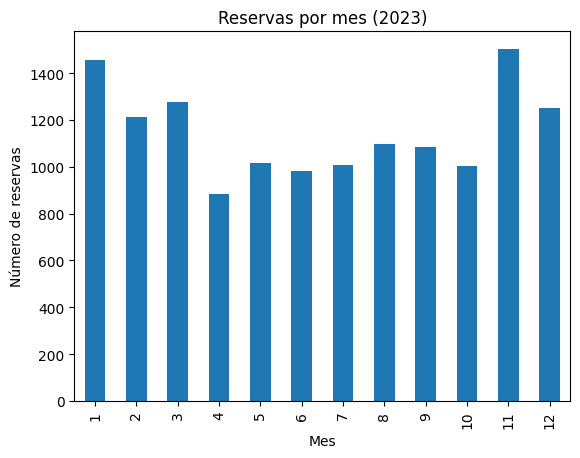

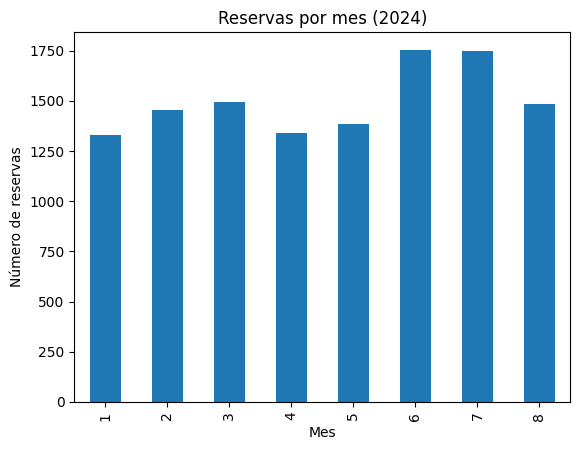

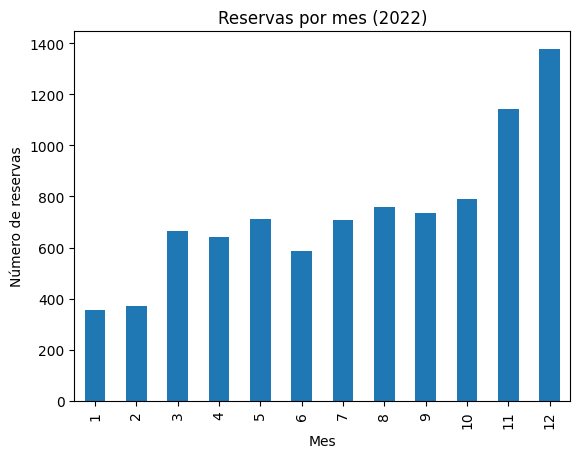

In [ ]:
# 1. Conteo de reservas por mes, distribuido por año
df_validado['Month'] = df_validado['Date'].dt.month
for year in df_validado['Year'].unique():
    monthly_reservations = df_validado[df_validado['Year'] == year]['Month'].value_counts().sort_index()
    plt.figure()
    monthly_reservations.plot(kind='bar', title=f"Reservas por mes ({year})", ylabel="Número de reservas", xlabel="Mes")
    plt.show()

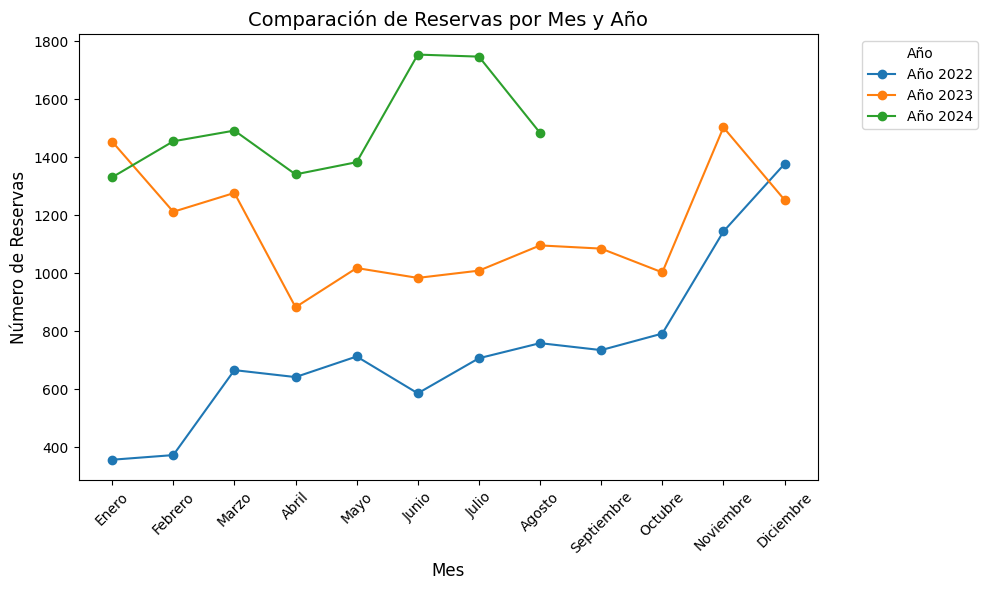

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Agregar la columna 'Month' y 'Year' si no están presentes
df_validado['Month'] = df_validado['Date'].dt.month
df_validado['Year'] = df_validado['Date'].dt.year

# 2. Contar las reservas por mes y por año
monthly_reservations = df_validado.groupby(['Year', 'Month']).size().unstack(fill_value=0)

# 3. Crear el gráfico de líneas comparativo
plt.figure(figsize=(10, 6))

# Graficar líneas para cada año
for year in [2022, 2023, 2024]:
    if year in monthly_reservations.index:
        # Si es el año 2024, recortar los datos hasta el mes 8
        if year == 2024:
            plt.plot(monthly_reservations.columns[:8], monthly_reservations.loc[year][:8], label=f'Año {year}', marker='o')
        else:
            plt.plot(monthly_reservations.columns, monthly_reservations.loc[year], label=f'Año {year}', marker='o')

# Mejorar presentación del gráfico
plt.title('Comparación de Reservas por Mes y Año', fontsize=14)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Número de Reservas', fontsize=12)
plt.xticks(monthly_reservations.columns, labels=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'], rotation=45)
plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')  # Para ubicar la leyenda fuera del gráfico
plt.tight_layout()

# Mostrar gráfico
plt.show()


In [ ]:
cantidad_habitaciones = df_validado['Room Number'].nunique()
print(f"Cantidad de habitaciones: {cantidad_habitaciones}")

Cantidad de habitaciones: 292


In [ ]:
df_validado['Stay Duration'].unique()

array([  3,   2,   1,   5,   0,   4,  18,   6,   7,  13,  24,   9,  29,
        26,  31,  14,  16,  15,  17,   8,  12,  55,  20,  68,  19,  10,
        11,  22,  25,  36,  21,  42,  50,  40,  23,  44,  48,  95,  27,
        38,  33,  43, 116,  41,  34,  62,  28,  46,  37,  35,  71,  47,
        91,  39,  53,  32,  45,  54,  80,  30,  66,  78,  81,  56])

In [ ]:
# Frecuencia de Room Type
print("\nFrecuencia de Room Type:")
print(df_validado['Room Type'].value_counts())




Frecuencia de Room Type:
Room Type
GENR    10937
SUIT     5527
CITY     3891
DKNG     3308
EXEC     2408
DBDB     2212
QUEN     2082
TWTW     1838
VIEW     1212
TWIN      863
CCTY      101
CCTA       94
PENT       69
PRES       52
KING       21
Name: count, dtype: int64


In [ ]:
df_validado = df_validado[df_validado['Currency Code']!= 'ARS']

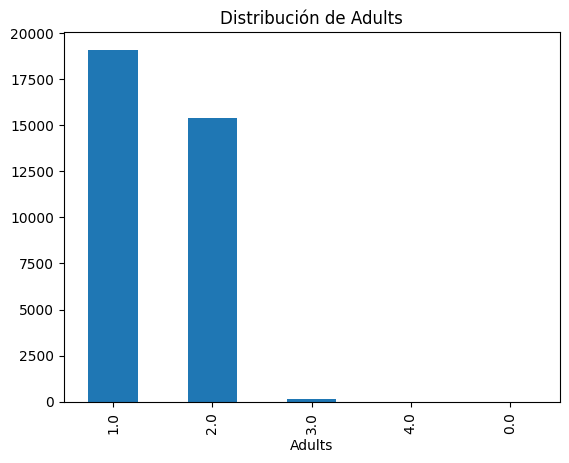

In [ ]:
# Histograma de variables numéricas
df_validado['Adults'].value_counts().plot(kind='bar', title="Distribución de Adults")
plt.show()

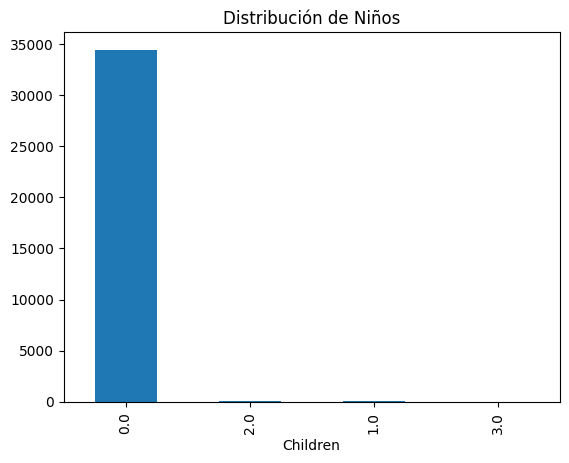

In [ ]:
df_validado['Children'].value_counts().plot(kind='bar', title="Distribución de Niños")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
# Crear una columna que clasifique el tipo de viajero
def classify_guest(row):
    if row['Children'] >= 1 and row['Adults'] >= 1:
        return 'Family'
    elif row['Adults'] == 2 and row['Children'] == 0:
        return 'Couple'
    elif row['Adults'] == 1 and row['Children'] == 0:
        return 'Solo'
    else:
        return 'Adult Group'

In [ ]:
df_validado['Guest Type'] = df_validado.apply(classify_guest, axis=1)

In [ ]:
df_validado['Guest Type'].value_counts()

,count
Guest Type,
Solo,19069
Couple,15203
Family,179
Adult Group,163


In [ ]:
import seaborn as sns
reservations = df_validado.groupby(['Year-Month', 'Guest Type']).size().reset_index(name='Reservations')


In [ ]:
reservations.describe()

,Reservations
count,121.000000
mean,286.066116
std,306.289888
min,1.000000
25%,5.000000
50%,243.000000
75%,543.000000
max,1107.000000


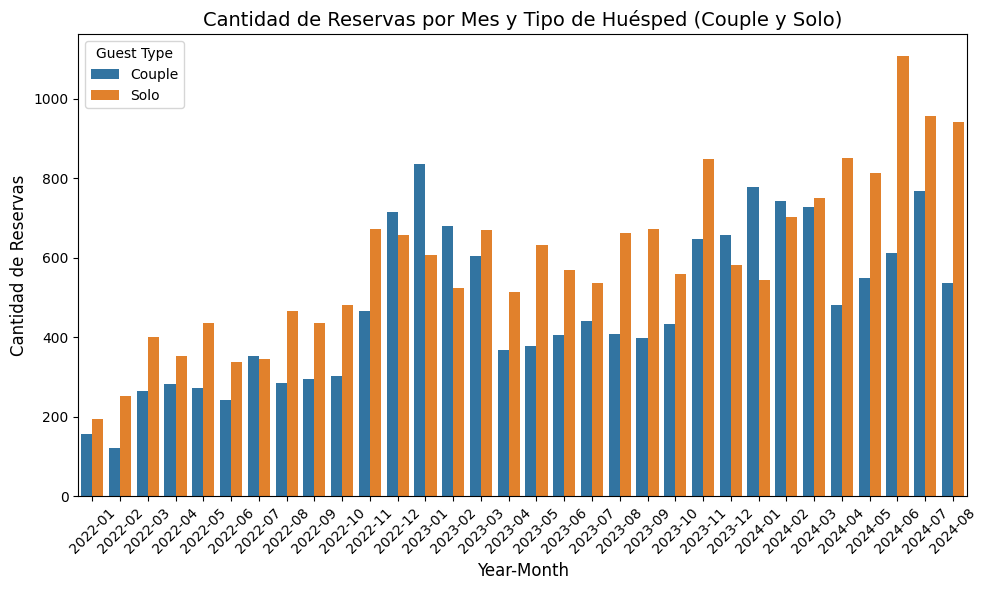

In [ ]:
# Filtrar solo las categorías 'Couple' y 'Solo'
filtered_reservations = reservations[reservations['Guest Type'].isin(['Couple', 'Solo'])]

# Configurar el gráfico
plt.figure(figsize=(10, 6))
sns.barplot(data=filtered_reservations, x='Year-Month', y='Reservations', hue='Guest Type', palette='tab10')

# Personalización
plt.title('Cantidad de Reservas por Mes y Tipo de Huésped (Couple y Solo)', fontsize=14)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Cantidad de Reservas', fontsize=12)
plt.legend(title='Guest Type')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [ ]:
# Analizar el tipo de habitación más utilizado por cada grupo
room_by_guest_type = df_validado.groupby(['Guest Type', 'Room Type']).size().unstack(fill_value=0)
most_common_rooms = room_by_guest_type.idxmax(axis=1)

print("Habitaciones más utilizadas por tipo de huésped:")
print(most_common_rooms)

Habitaciones más utilizadas por tipo de huésped:
Guest Type
Adult Group    TWIN
Couple         GENR
Family         TWIN
Solo           GENR
dtype: object


In [ ]:
df_validado.columns

Index(['Date', 'Room Type', 'Adults', 'Children', 'Package Code',
       'Currency Code', 'Amount', 'Check-in Date', 'Check-out Date',
       'Room Number', 'Stay Duration', 'Year', 'Month', 'Year-Month',
       'Guest Type'],
      dtype='object')

Cantidad de noches promedio por tipo de habitación:
Room Type
CCTA    3.117021
CCTY    2.683168
CITY    3.001542
DBDB    2.581826
DKNG    2.987606
EXEC    2.912375
GENR    2.731188
KING    6.714286
PENT    2.695652
PRES    2.826923
QUEN    3.066282
SUIT    3.246246
TWIN    2.629200
TWTW    2.359826
VIEW    2.655116
Name: Stay Duration, dtype: float64


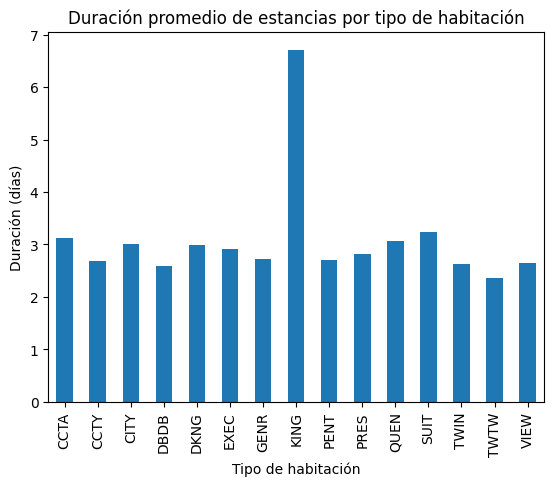

In [ ]:
# Calcular la cantidad de noches promedio por tipo de habitación
stay_duration_by_room = df_validado.groupby('Room Type')['Stay Duration'].mean()

print("Cantidad de noches promedio por tipo de habitación:")
print(stay_duration_by_room)

# Graficar
stay_duration_by_room.plot(kind='bar', title="Duración promedio de estancias por tipo de habitación", ylabel="Duración (días)", xlabel="Tipo de habitación")
plt.show()

In [ ]:
# Filtrar solo los tipos de habitación deseados
filtered_df = df_validado[df_validado['Room Type'].isin(['GENR', 'SUIT', 'CITY', 'TWIN'])]

# Calcular el promedio de 'Amount' por 'Year-Month' y 'Room Type'
average_amount = (
    filtered_df.groupby(['Year-Month', 'Room Type'])['Amount']
    .mean()
    .reset_index()
)
average_amount['Year-Month'] = average_amount['Year-Month'].astype(str)

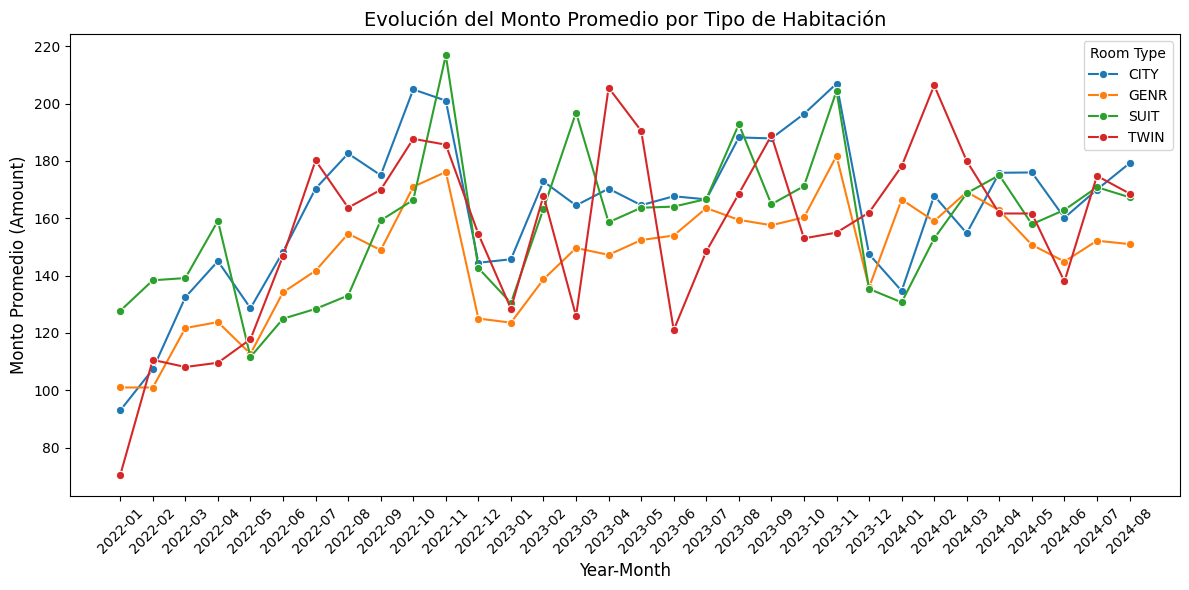

In [ ]:
# Configurar el gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_amount, x='Year-Month', y='Amount', hue='Room Type', marker='o', palette='tab10')

# Personalización
plt.title('Evolución del Monto Promedio por Tipo de Habitación', fontsize=14)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Monto Promedio (Amount)', fontsize=12)
plt.legend(title='Room Type', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [ ]:
room_summary = (
    df_validado.groupby('Room Type')
    .agg(
        Count=('Room Number', lambda x: len(x.unique())),  # Cantidad de habitaciones únicas
        Room_Numbers=('Room Number', lambda x: list(x.unique()))  # Lista de números únicos
    )
    .reset_index()
)

In [ ]:
print(room_summary)

   Room Type  Count                                       Room_Numbers
0       CCTA      1                                           [1002.0]
1       CCTY      1                                           [1202.0]
2       CITY     25  [821.0, 1721.0, 621.0, 1003.0, 1203.0, 1402.0,...
3       DBDB     15  [1222.0, 1622.0, 2122.0, 822.0, 1122.0, 1822.0...
4       DKNG     21  [606.0, 725.0, 1206.0, 1704.0, 406.0, 706.0, 1...
5       EXEC     14  [729.0, 829.0, 1029.0, 1429.0, 1629.0, 1829.0,...
6       GENR    112  [407.0, 411.0, 508.0, 511.0, 512.0, 728.0, 527...
7       KING      1                                            [427.0]
8       PENT      1                                           [1801.0]
9       PRES      1                                           [1921.0]
10      QUEN     44  [1226.0, 1109.0, 2126.0, 509.0, 810.0, 814.0, ...
11      SUIT     30  [1506.0, 1407.0, 1408.0, 1507.0, 1603.0, 1706....
12      TWIN      7  [2125.0, 525.0, 625.0, 825.0, 925.0, 1025.0, 4...
13    

In [ ]:
import pandas as pd

# 1. Asegurarse de que las columnas 'Check-in Date' y 'Year-Month' están correctamente formateadas
df_validado['Year-Month'] = df_validado['Check-in Date'].dt.to_period('M')  # Crear la columna 'Year-Month'

# 2. Filtrar los datos para los años 2023 y 2024
df_filtered = df_validado[(df_validado['Check-in Date'].dt.year == 2023) | (df_validado['Check-in Date'].dt.year == 2024)]

# 3. Agrupar por 'Year-Month' y 'Room Number', y contar los usos
room_usage = (
    df_filtered.groupby(['Year-Month', 'Room Number'])
    .size()
    .reset_index(name='Usage')
)

# 4. Ordenar por 'Year-Month' y 'Usage' descendente
room_usage = room_usage.sort_values(['Year-Month', 'Usage'], ascending=[True, False])

# 5. Seleccionar las dos habitaciones más utilizadas por mes
top_rooms_per_month = room_usage.groupby('Year-Month').head(2)

# 6. Mostrar el resultado
print(top_rooms_per_month)


     Year-Month  Room Number  Usage
166     2023-01       1407.0     17
185     2023-01       1508.0     16
514     2023-02       2025.0     13
373     2023-02       1007.0     12
548     2023-03        521.0     18
707     2023-03       1421.0     16
1000    2023-04       1721.0     11
966     2023-04       1507.0     10
1261    2023-05       1706.0     12
1102    2023-05        711.0     11
1401    2023-06       1003.0     12
1542    2023-06       2121.0     11
1671    2023-07       1106.0     12
1761    2023-07       1721.0     11
1849    2023-08        706.0     11
1906    2023-08       1006.0     11
2301    2023-09       2026.0     13
2214    2023-09       1406.0     12
2553    2023-10       2024.0     14
2504    2023-10       1603.0     13
2777    2023-11       1602.0     17
2812    2023-11       1822.0     16
3050    2023-12       1706.0     14
3002    2023-12       1408.0     12
3327    2024-01       1804.0     16
3309    2024-01       1703.0     15
3478    2024-02       1111.0

In [ ]:
top_rooms_per_month.describe()

,Room Number,Usage
count,40.000000,40.000000
mean,1442.100000,13.700000
std,451.066758,2.266817
min,403.000000,10.000000
25%,1105.000000,12.000000
50%,1555.000000,13.000000
75%,1723.750000,16.000000
max,2122.000000,18.000000


## Preparacion de Datos para el Modelo

In [ ]:
date_range = pd.date_range(start=df_validado['Check-in Date'].min(),
                           end=df_validado['Check-out Date'].max())

In [ ]:
daily_occupancy = pd.DataFrame({'Date': date_range})

In [ ]:
daily_occupancy['Rooms'] = 0

In [ ]:
# Calcular habitaciones ocupadas para cada día
for index, row in df_validado.iterrows():
    check_in = row['Check-in Date']
    check_out = row['Check-out Date']
    # Incrementar las habitaciones ocupadas en el rango de fechas correspondiente
    daily_occupancy.loc[(daily_occupancy['Date'] >= check_in) &
                        (daily_occupancy['Date'] < check_out), 'Rooms'] += 1

In [ ]:
daily_occupancy.head()

,Date,Rooms
0,2022-01-01,14
1,2022-01-02,18
2,2022-01-03,15
3,2022-01-04,28
4,2022-01-05,31


In [ ]:
daily_occupancy['% Occupation'] = (daily_occupancy['Rooms'] / cantidad_habitaciones)*100

In [ ]:
daily_occupancy = daily_occupancy[daily_occupancy['Date'] <= '2024-08-31']

In [ ]:
# Calcular el día de la semana (0=lunes, 1=martes, ..., 6=domingo)
daily_occupancy['Day_of_Week'] = daily_occupancy['Date'].dt.dayofweek

# Si prefieres el nombre del día en lugar del número (por ejemplo: 'lunes', 'martes', etc.)
# df_validado['Nombre_dia'] = df_validado['Date'].dt.strftime('%A')

In [ ]:
daily_occupancy['Year-Month'] = daily_occupancy['Date'].dt.to_period('M').astype(str) + '-01'
daily_occupancy['Year-Month'] = pd.to_datetime(daily_occupancy['Year-Month'])

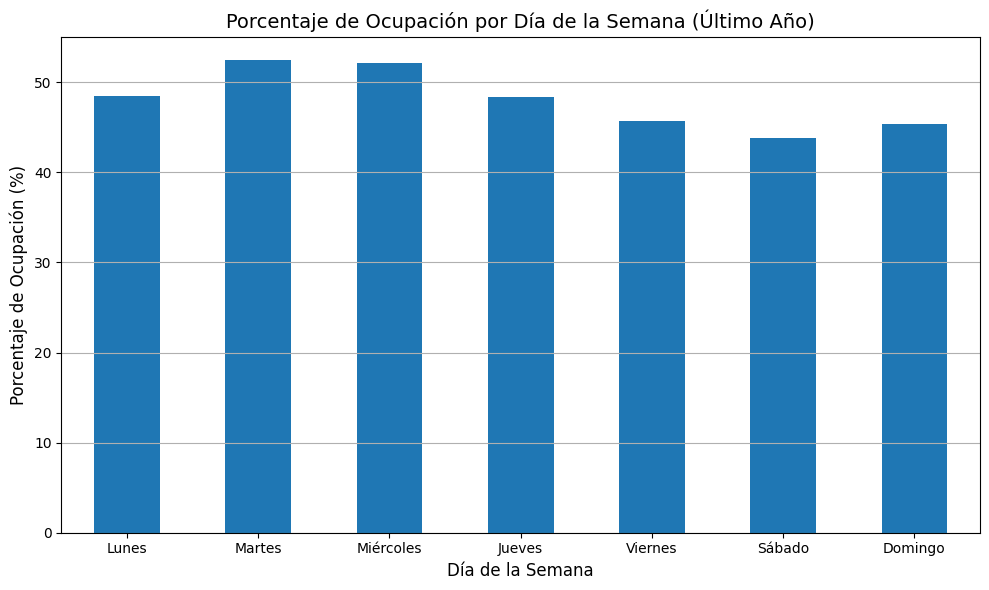

In [ ]:
daily_occupancy['Year'] = daily_occupancy['Date'].dt.year
last_year = daily_occupancy[daily_occupancy['Year'] == 2024]
ocupacion_por_dia = last_year.groupby('Day_of_Week')['% Occupation'].mean()

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
ocupacion_por_dia.plot(kind='bar')

# Configurar el gráfico
plt.title('Porcentaje de Ocupación por Día de la Semana (Último Año)', fontsize=14)
plt.xlabel('Día de la Semana', fontsize=12)
plt.ylabel('Porcentaje de Ocupación (%)', fontsize=12)
plt.xticks(ticks=range(7), labels=['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'], rotation=0)
plt.grid(axis='y')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [ ]:
daily_occupancy.describe()

,Date,Rooms,% Occupation,Day_of_Week,Year-Month,Year
count,974,974.000000,974.000000,974.000000,974,974.000000
mean,2023-05-02 12:00:00,101.700205,34.828837,3.002053,2023-04-17 18:28:49.774127104,2022.875770
min,2022-01-01 00:00:00,14.000000,4.794521,0.000000,2022-01-01 00:00:00,2022.000000
25%,2022-09-01 06:00:00,71.000000,24.315068,1.000000,2022-09-01 00:00:00,2022.000000
50%,2023-05-02 12:00:00,101.000000,34.589041,3.000000,2023-05-01 00:00:00,2023.000000
75%,2023-12-31 18:00:00,127.000000,43.493151,5.000000,2023-12-24 06:00:00,2023.750000
max,2024-08-31 00:00:00,262.000000,89.726027,6.000000,2024-08-01 00:00:00,2024.000000
std,NaN,40.650498,13.921403,2.001026,NaN,0.781313


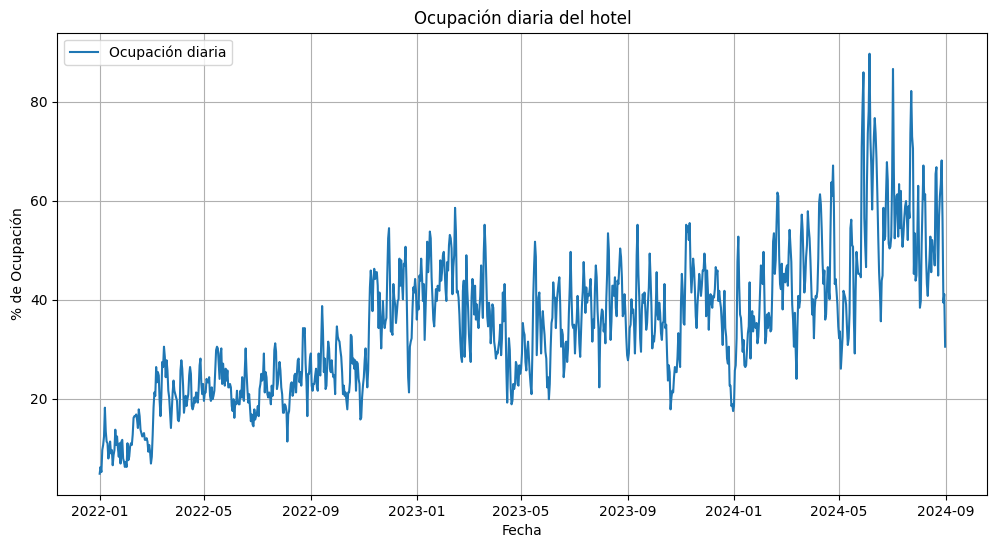

In [ ]:
# Graficar ocupación diaria
plt.figure(figsize=(12, 6))
plt.plot(daily_occupancy['Date'], daily_occupancy['% Occupation'], label="Ocupación diaria")
plt.title("Ocupación diaria del hotel")
plt.xlabel("Fecha")
plt.ylabel("% de Ocupación")
plt.legend()
plt.grid()
plt.show()

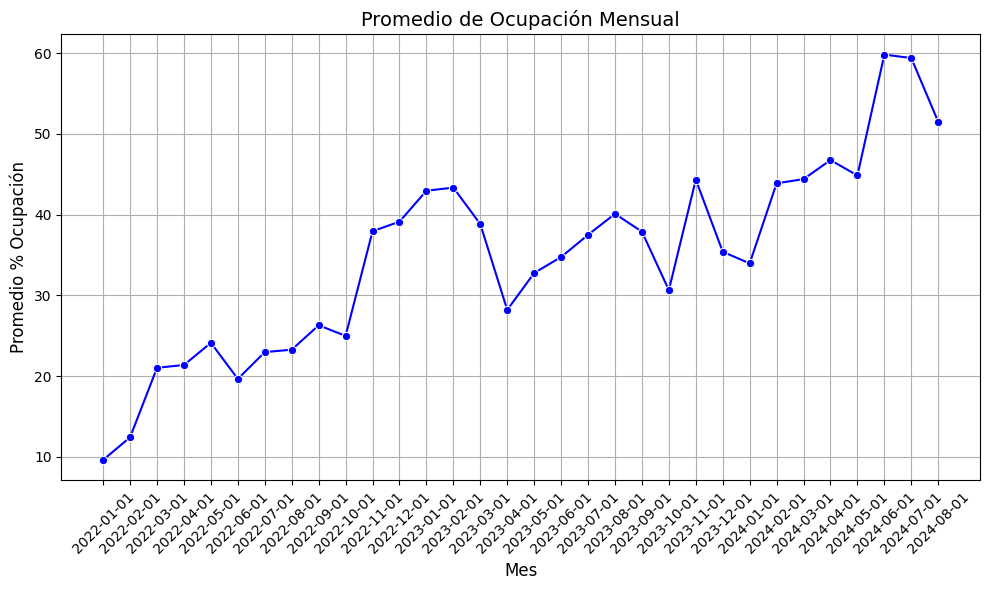

In [ ]:
monthly_occupancy = (
    daily_occupancy.groupby('Year-Month')['% Occupation']
    .mean()
    .reset_index()
)

# Convertir 'Year-Month' a formato string para el gráfico
monthly_occupancy['Year-Month'] = monthly_occupancy['Year-Month'].astype(str)

# Configurar el gráfico
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_occupancy, x='Year-Month', y='% Occupation', marker='o', color='blue')

# Personalización
plt.title('Promedio de Ocupación Mensual', fontsize=14)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Promedio % Ocupación', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## Series de Tiempo

### Estudio de la estacionalidad

### Análisis de la Tendencia, Estacionalidad y Ruido

In [ ]:
# Convertir 'Year-Month' a formato datetime
monthly_occupancy['Year-Month'] = pd.to_datetime(monthly_occupancy['Year-Month'])
# Establecer 'Year-Month' como índice para trabajar con la serie de tiempo
monthly_occupancy.set_index('Year-Month', inplace=True)

# Verificar el formato
print(monthly_occupancy.head())

            % Occupation
Year-Month              
2022-01-01      9.611136
2022-02-01     12.414384
2022-03-01     21.022978
2022-04-01     21.369863
2022-05-01     24.116217


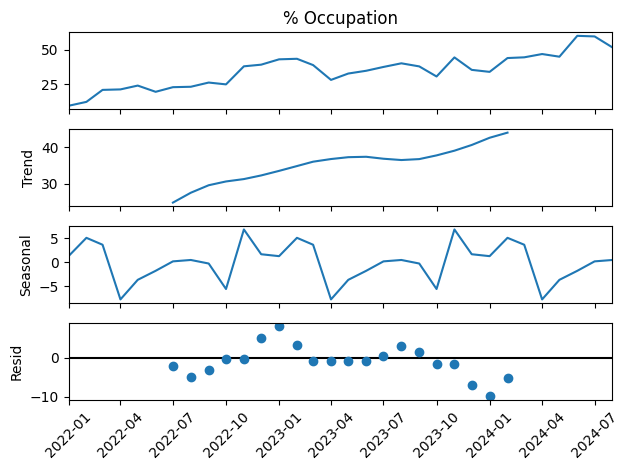

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Descomposición estacional
decomposed = seasonal_decompose(monthly_occupancy['% Occupation'], model='additive', period=12)
fig = decomposed.plot()
for ax in fig.axes:
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


* Tendencia: La serie muestra un aumento en la tendencia a lo largo del tiempo, indicando que la ocupación de habitaciones está creciendo.

* Estacionalidad: Hay fluctuaciones regulares que sugieren un comportamiento estacional, probablemente relacionado con temporadas altas y bajas de ocupación.

* Residuales: Hay variaciones alrededor de 0, pero podría haber algo de heterocedasticidad, lo que requiere validación adicional.

Producto de la tendencia positiva (en crecimiento), lo que indica que la serie no es estacionaria en nivel es necesario estacionar la serie antes de aplicarle los modelos de serie de tiempo

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [ ]:
data = monthly_occupancy.copy()

Prueba ADF inicial:
ADF Statistic: -1.9531431887919746
p-value: 0.30748825458915585
Critical Value (1%): -3.661428725118324
Critical Value (5%): -2.960525341210433
Critical Value (10%): -2.6193188033298647
La serie no es estacionaria. Aplicaremos diferenciación.


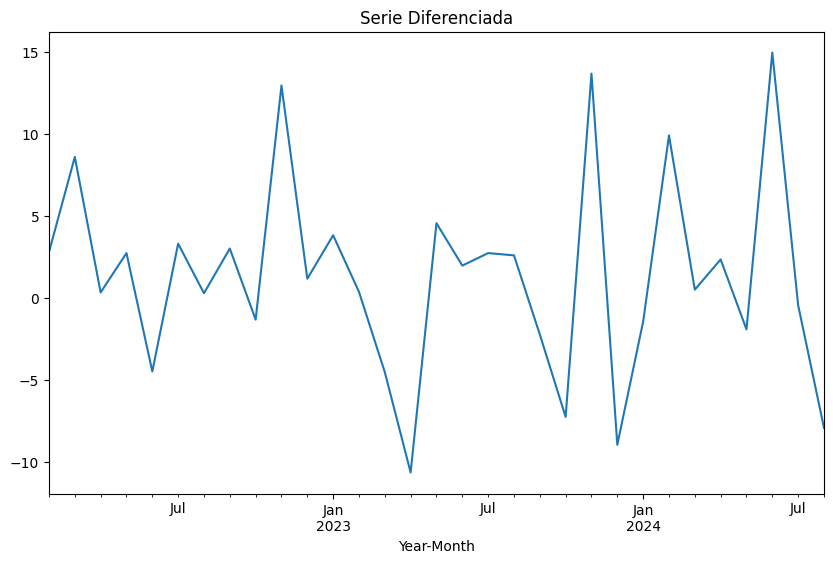

Prueba ADF después de la diferenciación:
ADF Statistic: -6.673771400034464
p-value: 4.5187940228327065e-09
Critical Value (1%): -3.6699197407407405
Critical Value (5%): -2.9640707407407407
Critical Value (10%): -2.621171111111111


In [ ]:
monthly_occupancy = (
    daily_occupancy.groupby('Year-Month')['% Occupation']
    .mean()
    .reset_index()
)
monthly_occupancy = monthly_occupancy.reset_index()
monthy_occupancy = monthly_occupancy[monthly_occupancy['Year-Month'] >= '2023-01']
monthly_occupancy.set_index('Year-Month', inplace=True)
# Prueba ADF
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print(f'Critical Value ({key}): {value}')
    return result[1]

# Prueba inicial
print("Prueba ADF inicial:")
p_value = adf_test(monthly_occupancy['% Occupation'])

if p_value > 0.05:
    print("La serie no es estacionaria. Aplicaremos diferenciación.")
    # Aplicar diferenciación
    monthly_occupancy['Diff'] = monthly_occupancy['% Occupation'].diff()
    monthly_occupancy['Diff'].dropna().plot(title='Serie Diferenciada', figsize=(10, 6))
    plt.show()
    # Volver a probar ADF
    print("Prueba ADF después de la diferenciación:")
    adf_test(monthly_occupancy['Diff'].dropna())


#### Modelo SARIMA

SARIMA (Seasonal Autoregressive Integrated Moving Average)

es un modelo estadístico que predice series temporales considerando tanto la estacionalidad como las tendencias en los datos. Para la demanda hotelera, al aplicar un enfoque mensual, SARIMA captura patrones estacionales (como aumentos en la demanda durante las vacaciones) y tendencias (como el crecimiento o declive en la demanda a lo largo del tiempo).

Partes del modelo SARIMA:

AR (Autoregresivo): Este componente modela la relación entre el valor actual y los valores pasados de la serie temporal. En tu caso, se puede usar para capturar la relación entre la ocupación hotelera de un mes con la ocupación de los meses anteriores.

I (Integración): Este componente se encarga de hacer que la serie temporal sea estacionaria (es decir, que no tenga tendencias sistemáticas a lo largo del tiempo). Esto es importante porque las predicciones de ocupación se basan en cambios estacionales y no en tendencias de largo plazo. Al integrar la serie temporal (restando los valores anteriores), se puede eliminar esta tendencia.

MA (Media Móvil): El componente de media móvil modela el error de la predicción como una combinación lineal de los errores pasados. En este caso, captura los efectos inesperados que podrían afectar la ocupación, como eventos imprevistos o cambios de última hora en la demanda.

S (Estacionalidad): Este componente agrega una capa adicional para capturar los patrones estacionales, como los picos de demanda durante ciertas épocas del año (vacaciones, festividades, etc.). Es fundamental en la predicción de ocupación hotelera, ya que la demanda es muy estacional.



SARIMA: Útil para la predicción de la ocupación mensual, aprovechando su capacidad para manejar la estacionalidad y tendencias a largo plazo.

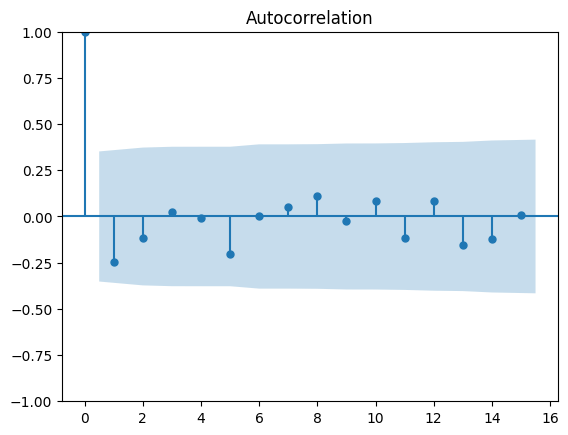

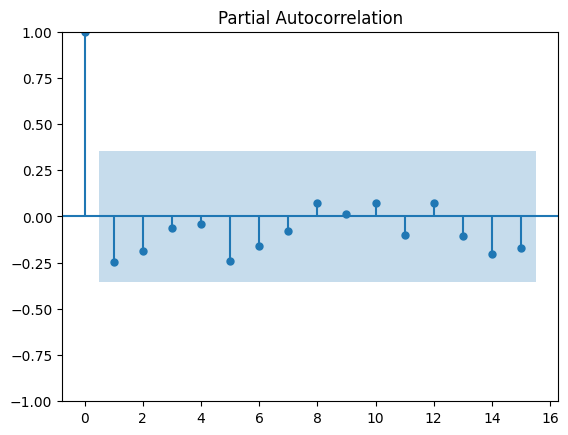

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Calculate the maximum allowed lags
max_lags = len(monthly_occupancy['Diff'].dropna()) // 2

# Use the minimum between desired lags and maximum allowed lags
lags = min(24, max_lags)

plot_acf(monthly_occupancy['Diff'].dropna(), lags=lags)
plot_pacf(monthly_occupancy['Diff'].dropna(), lags=lags)
plt.show()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from prophet import Prophet
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from itertools import product
import warnings

# Entrenamiento de SARIMA
sarima_model = SARIMAX(
    monthly_occupancy['% Occupation'],
    order=(1, 1, 1),
    seasonal_order=(1, 1, 1, 12),
    enforce_stationarity=False,
    enforce_invertibility=False
)

results = sarima_model.fit()
print(results.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                       % Occupation   No. Observations:                   32
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 -17.590
Date:                            Sun, 15 Dec 2024   AIC                             45.179
Time:                                    14:22:43   BIC                             43.226
Sample:                                01-01-2022   HQIC                            39.938
                                     - 08-01-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1776      2.304      0.077      0.939      -4.338       4.693
ma.L1         -1.0001   1.14e+04  -

KPIs del modelo SARIMA:
Root Mean Squared Error (RMSE): 6.29
Mean Absolute Error (MAE): 4.91
R²: 0.73
MAPE: 16.63


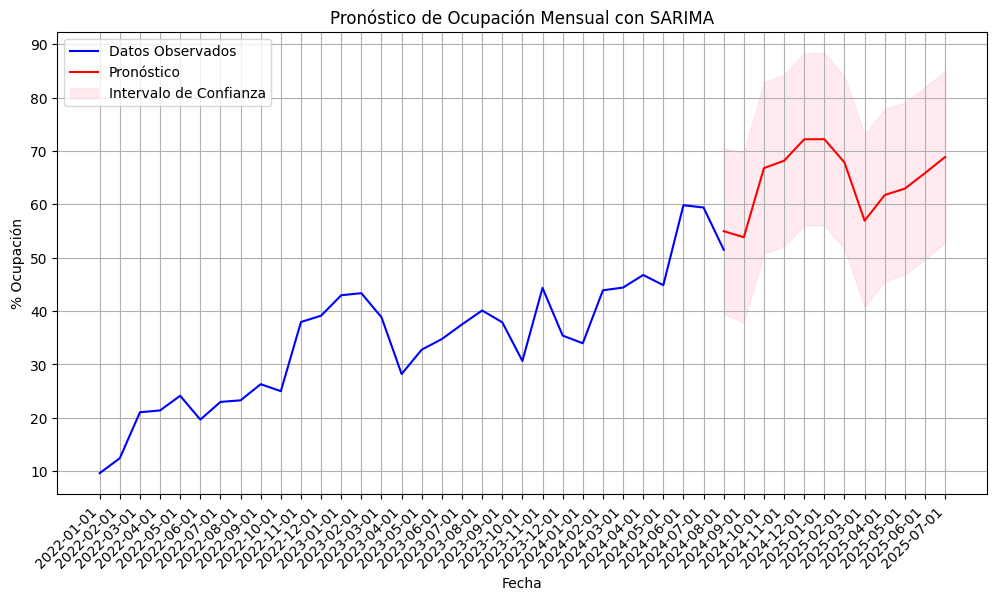

In [ ]:
# Diagnóstico del modelo
# Get the residuals from the SARIMA model
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predicción (entrenamiento y validación en serie)
forecast = results.get_forecast(steps=12)  # 12 meses futuros
forecast_index = pd.date_range(start=monthly_occupancy.index[-1], periods=12, freq='MS')
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Métricas de validación en datos históricos
# Calcular predicción in-sample para comparar con los datos reales
historical_predictions = results.get_prediction(start=monthly_occupancy.index[0], end=monthly_occupancy.index[-1])
historical_forecast_mean = historical_predictions.predicted_mean

# Calcular KPIs (RMSE, MAE, MAPE)
actual_values = monthly_occupancy['% Occupation']
rmse = np.sqrt(mean_squared_error(actual_values, historical_forecast_mean))
mae = mean_absolute_error(actual_values, historical_forecast_mean)
mape = np.mean(np.abs((actual_values - historical_forecast_mean) / actual_values)) * 100
r2 = r2_score(actual_values, historical_forecast_mean)
# Mostrar KPIs
print(f"KPIs del modelo SARIMA:")
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R²: {r2:.2f}')
print(f'MAPE: {mape:.2f}')

# Visualización: Predicción y datos históricos
plt.figure(figsize=(12, 6))

# Combine historical and forecasted data for plotting
all_data_index = monthly_occupancy.index.astype(str).tolist() + forecast_index.astype(str).tolist()
all_data_values = monthly_occupancy['% Occupation'].tolist() + forecast_mean.tolist()

# Plot historical data
plt.plot(monthly_occupancy.index.astype(str).tolist(), monthly_occupancy['% Occupation'], label='Datos Observados', color='blue')

# Plot predicted data
plt.plot(forecast_index.astype(str).tolist(), forecast_mean, label='Pronóstico', color='red')

# Fill confidence interval
plt.fill_between(forecast_index.astype(str).tolist(), forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3, label='Intervalo de Confianza')

plt.legend(loc='upper left')
plt.title('Pronóstico de Ocupación Mensual con SARIMA')
plt.xlabel('Fecha')
plt.ylabel('% Ocupación')
plt.grid(True)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

#### Modelo LSTM

LSTM (Long Short-Term Memory) es un tipo de red neuronal recurrente (RNN) especializada en manejar dependencias a largo plazo en series temporales. Para predecir la demanda hotelera con un enfoque diario, LSTM puede aprender patrones complejos en los datos, como fluctuaciones no lineales y efectos de largo plazo (por ejemplo, eventos especiales o promociones). Su ventaja radica en su capacidad para capturar interacciones más complejas y no lineales en los datos, mejorando la precisión en predicciones a corto plazo cuando los datos son más complejos y ruidosos.

Partes del modelo LSTM:

Celdas de memoria: El LSTM está compuesto por celdas que "recuerdan" información a largo plazo. Cada celda puede retener datos importantes por largos períodos, lo cual es útil cuando las fluctuaciones de la ocupación hotelera se deben a factores que ocurren en un rango temporal extenso (como eventos o promociones).

Puertas:

Puerta de entrada: Controla la cantidad de información nueva que se introduce en la celda de memoria. Es útil para aprender nuevos patrones de ocupación que ocurren por eventos imprevistos.
Puerta de olvido: Decide qué información debe desecharse de la memoria. Esto es útil cuando ciertos patrones previos ya no son relevantes (por ejemplo, datos de ocupación de hace mucho tiempo que ya no afectan la demanda actual).
Puerta de salida: Determina qué parte de la memoria se debe usar para la predicción de la ocupación.
Capa de salida: Después de procesar los datos con las puertas y las celdas de memoria, la red produce una salida, que en tu caso sería la predicción diaria del porcentaje de ocupación.


LSTM: Más adecuado para la predicción de la ocupación diaria, dado su poder para modelar patrones complejos y dinámicos en datos de alta frecuencia, como los efectos de eventos puntuales o cambios repentinos.


In [ ]:
!pip install tensorflow

In [ ]:
# Filtramos el DataFrame para obtener datos desde octubre de 2023 hasta agosto de 2024
daily_occupancy_train = daily_occupancy[
    (daily_occupancy['Date'] >= '2023-01-01') &
    (daily_occupancy['Date'] <= '2024-08-31')
]


In [ ]:
daily_occupancy_train.head()

,Date,Rooms,% Occupation,Day_of_Week,Year-Month,Year
365,2023-01-01,105,35.958904,6,2023-01-01,2023
366,2023-01-02,116,39.726027,0,2023-01-01,2023
367,2023-01-03,111,38.013699,1,2023-01-01,2023
368,2023-01-04,131,44.863014,2,2023-01-01,2023
369,2023-01-05,128,43.835616,3,2023-01-01,2023


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Seleccionamos la columna de interés para predecir (en este caso '% Occupation')
data = daily_occupancy_train[['Date', '% Occupation']]

# Normalizamos los datos
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data[['% Occupation']])

# Convertimos las fechas en formato datetime si no están
data['Date'] = pd.to_datetime(data['Date'])

# Separación de los datos en entrenamiento y predicción
train_data = data_scaled[data['Date'] <= '2024-01-31']  # Datos hasta agosto 2024 (fecha de entrenamiento)
test_data = data_scaled[data['Date'] > '2024-01-31']  # Datos posteriores a agosto 2024 (para predicción)

# Creamos un dataset con ventanas para LSTM (por ejemplo, utilizando 3 días anteriores para predecir el siguiente)
def create_dataset(data, window_size=3):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:(i + window_size), 0])  # Datos de entrada (ventana de 3 días)
        y.append(data[i + window_size, 0])  # El siguiente día como objetivo
    return np.array(X), np.array(y)

# Convertimos los datos escalados en un formato adecuado para LSTM
window_size = 3
X_train, y_train = create_dataset(train_data, window_size)

# Reshape de los datos para LSTM: (samples, time_steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

# Construir el modelo LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))  # Dropout para evitar sobreajuste
model.add(Dense(units=1))  # Capa de salida
model.compile(optimizer='adam', loss='mean_squared_error')
# Construcción y entrenamiento del modelo LSTM
X_train, y_train = create_dataset(train_data, window_size)  # Esta es una función que debe ser implementada para crear los conjuntos de entrenamiento
model.fit(X_train, y_train, epochs=62, batch_size=16)




<ipython-input-136-42b3793ac80a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'])
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/62
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0745
Epoch 2/62
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0104
Epoch 3/62
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0101
Epoch 4/62
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0091
Epoch 5/62
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0093
Epoch 6/62
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0097
Epoch 7/62
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0097
Epoch 8/62
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0080
Epoch 9/62
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0089
Epoch 10/62
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0080
Epoch 11/62
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0083
Epoch 12/62
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0079
Epoch 13/62
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0079
Epoch 14/62
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0081
Epoch 15/62
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0084
Epoch 16/62
25/25 ━

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


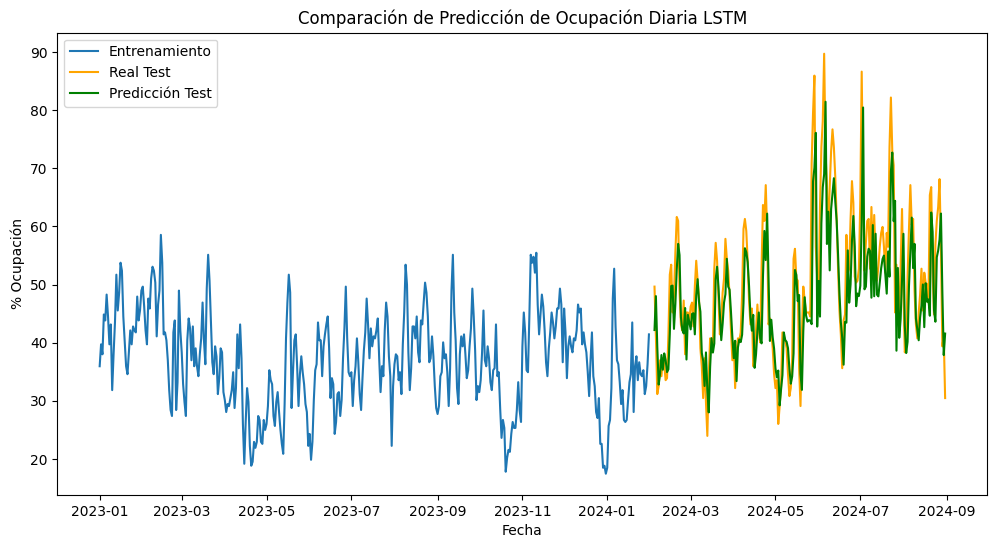

In [ ]:
# Realizamos las predicciones sobre los datos de prueba
X_test, y_test = create_dataset(test_data, window_size)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Hacemos predicciones sobre los datos de prueba
predictions = model.predict(X_test)

# Desescalamos las predicciones y los valores reales
predictions_rescaled = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Visualización de la comparación entre los datos reales y las predicciones
plt.figure(figsize=(12, 6))
plt.plot(data['Date'][:len(train_data)], scaler.inverse_transform(train_data), label='Entrenamiento')

# Adjust the x-axis data slicing to match the length of y_test_rescaled
plt.plot(data['Date'][len(train_data) + window_size:len(train_data) + len(test_data)], y_test_rescaled, label='Real Test', color='orange')
plt.plot(data['Date'][len(train_data) + window_size:len(train_data) + len(test_data)], predictions_rescaled, label='Predicción Test', color='green')

plt.xlabel('Fecha')
plt.ylabel('% Ocupación')
plt.title('Comparación de Predicción de Ocupación Diaria LSTM')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calcular el RMSE, MAE y R²
rmse = np.sqrt(mean_squared_error(y_test_rescaled, predictions_rescaled))
mae = mean_absolute_error(y_test_rescaled, predictions_rescaled)
r2 = r2_score(y_test_rescaled, predictions_rescaled)

# Mostrar los KPIs
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'R²: {r2:.4f}')
print(f'MAPE: {mape:.4f}')


Root Mean Squared Error (RMSE): 7.9526
Mean Absolute Error (MAE): 6.0676
R²: 0.5851
MAPE: 16.6330


In [ ]:
# Predicción para los próximos 30 días
predictions_30_days = []
last_data = train_data[-window_size:].reshape(1, window_size, 1)  # Últimos datos de entrenamiento para iniciar la predicción

for i in range(30):  # Predicción para 30 días
    future_prediction = model.predict(last_data)
    future_prediction_rescaled = scaler.inverse_transform(future_prediction)
    predictions_30_days.append(future_prediction_rescaled[0][0])

    # Actualizamos last_data para incluir la predicción más reciente y eliminar el valor más antiguo
    last_data = np.append(last_data[:, 1:, :], future_prediction.reshape(1, 1, 1), axis=1)

# Mostrar las predicciones para los próximos 30 días
future_dates = pd.date_range(data['Date'].max() + pd.Timedelta(days=1), periods=30).strftime('%Y-%m-%d')
for i, prediction in enumerate(predictions_30_days):
    print(f'Fecha: {future_dates[i]} - Predicción de ocupación: {prediction:.2f}%')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━

## Conclusión

El modelo LSTM muestra un R² de 0.57, lo que indica que, aunque es capaz de explicar algo más de la mitad de la variabilidad en los datos, todavía hay una cantidad significativa de error que no se puede capturar completamente. El RMSE (7.95) y el MAE (6.07) son relativamente altos, lo que sugiere que el modelo tiene dificultades para predecir con precisión la ocupación diaria. Esto podría ser el resultado de la complejidad inherente a los datos diarios, que incluyen factores imprevistos y de corto plazo difíciles de modelar con LSTM.


Por otro lado, el modelo SARIMA, aplicado al pronóstico mensual, muestra resultados ligeramente mejores en términos de RMSE y MAE, con un MAPE de 16.63%. Este modelo, al enfocarse en patrones estacionales y tendencias más predecibles a nivel mensual, ha demostrado ser más preciso en la predicción de la ocupación, particularmente cuando se trata de capturar tendencias estacionales recurrentes y no se ven afectados por los picos o caídas abruptas de corto plazo.

Aunque SARIMA muestra un mejor desempeño en las métricas actuales, el modelo LSTM es la mejor opción a largo plazo debido a su flexibilidad, capacidad para capturar patrones complejos y su potencial de mejora con más datos. Implementar LSTM posicionará al negocio de manera más sólida para enfrentar desafíos futuros y optimizar la toma de decisiones estratégicas.

### Importancia del análisis y recomendaciones futuras

Aplicar modelos de **series temporales** como SARIMA y LSTM es crucial en la predicción de la **ocupación hotelera**, ya que permite a los hoteles anticipar con mayor precisión la demanda futura y gestionar sus operaciones de manera más eficiente. Estas son algunas de las **ventajas clave**:

1. **Optimización de precios y recursos**: Con predicciones más precisas de la ocupación, los hoteles pueden ajustar dinámicamente sus precios (estrategias de **pricing**) y asignar recursos (personal, habitaciones, servicios) de manera más efectiva, evitando sobrecargar o subutilizar la infraestructura disponible.

2. **Planificación estratégica**: La capacidad de prever los picos y valles en la ocupación permite a los hoteles planificar promociones, eventos y ofertas especiales de forma más eficiente, mejorando la rentabilidad durante períodos de baja ocupación y maximizando el rendimiento durante las temporadas altas.

3. **Reducción de costos operativos**: Una mejor previsión de la ocupación reduce la incertidumbre en las operaciones diarias, lo que permite a los hoteles minimizar costos operativos innecesarios, como mantener personal o servicios adicionales sin la demanda esperada.

4. **Mejora de la experiencia del cliente**: Al poder prever los períodos de alta ocupación, los hoteles pueden gestionar mejor la calidad del servicio, ofreciendo una experiencia más consistente y mejorando la satisfacción de los huéspedes.

5. **Resiliencia frente a cambios imprevistos**: Los modelos de series temporales permiten a los hoteles adaptarse rápidamente a eventos inesperados (como desastres naturales o pandemias) al modelar tanto tendencias pasadas como factores imprevistos, lo que ayuda a mitigar los impactos negativos en la ocupación.

En resumen, el uso de **series temporales** para predecir la ocupación hotelera no solo mejora la precisión de las previsiones, sino que también tiene un impacto directo en la eficiencia operativa y la capacidad de los hoteles para adaptarse a la dinámica de la demanda. La integración de estos modelos en la estrategia empresarial es esencial para tomar decisiones basadas en datos, optimizando recursos, precios y la experiencia del cliente, lo que, en última instancia, contribuye a una ventaja competitiva en el sector hotelero.

### Propuesta de A/B Testing

### **1. Objetivo del A/B Testing**

El objetivo principal del A/B Testing en este caso sería **comparar dos enfoques de predicción de ocupación hotelera** basados en LSTM para determinar cuál ofrece mejores resultados en términos de precisión y aplicabilidad en la estrategia hotelera. Esto puede implicar comparar:
- **Enfoque A (Modelo LSTM Actual)**: El modelo LSTM que has usado para predecir la ocupación diaria sin ningún cambio.
- **Enfoque B (Modelo LSTM Optimizado)**: Un modelo LSTM con ajustes adicionales, como nuevos parámetros o inclusión de variables adicionales, para ver si se mejora la precisión.

**Hipótesis:**
- **Hipótesis nula (H0):** No hay diferencia significativa en la precisión de las predicciones de ocupación hotelera entre el Modelo LSTM Actual (A) y el Modelo LSTM Optimizado (B).
- **Hipótesis alternativa (H1):** El Modelo LSTM Optimizado (B) genera predicciones de ocupación hotelera más precisas que el Modelo LSTM Actual (A).



### **2. Definir las Variables a Medir**

Las variables clave que se medirán durante el A/B Testing deben estar relacionadas con la precisión y efectividad de las predicciones, como:

- **Root Mean Squared Error (RMSE)**: Medirá la magnitud de los errores de las predicciones.
- **Mean Absolute Error (MAE)**: Ayuda a comprender la precisión de las predicciones en términos absolutos.
- **R² (Coeficiente de determinación)**: Indica qué tan bien se explica la variabilidad de la ocupación por el modelo.
- **MAPE (Mean Absolute Percentage Error)**: Mide la precisión de las predicciones en términos porcentuales.



### **3. Selección de Grupos de Prueba**

Para realizar un A/B Test, necesitas dividir los datos de forma aleatoria en **dos grupos**:

- **Grupo A (Control)**: Los datos históricos de ocupación serán utilizados para alimentar el **Modelo LSTM Actual** (sin optimizar).
- **Grupo B (Experimental)**: Los mismos datos históricos de ocupación se usarán para alimentar el **Modelo LSTM Optimizado** (con mejoras o ajustes adicionales).

**Ejemplo de asignación de los datos**:
- **Grupo A**: Datos de ocupación de los últimos 6 meses.
- **Grupo B**: Datos de ocupación de los últimos 6 meses con parámetros ajustados, mayor cantidad de features, o cambio en la arquitectura de LSTM (por ejemplo, ajuste de capas y unidades).



### **4. Implementación de los Modelos LSTM**

1. **Preparación de los datos:**
   - Preprocesamiento de los datos (normalización, manejo de valores nulos, y segmentación de los datos en ventanas temporales).
   - División de los datos en entrenamiento y prueba, asegurando que ambos grupos A y B tengan una distribución similar.

2. **Entrenamiento del Modelo LSTM**:
   - **Modelo A (LSTM Actual)**: Entrenamiento del modelo LSTM sobre los datos del grupo A utilizando la arquitectura actual de la red neuronal (número de capas, unidades, optimizadores, etc.).
   - **Modelo B (LSTM Optimizado)**: Entrenamiento del modelo LSTM sobre los datos del grupo B con ajustes (por ejemplo, diferentes arquitecturas, mayor número de epochs, ajustes en el tamaño de las capas, nuevos features, regularización, etc.).



### **5. Resultados y Evaluación de los Modelos**

Una vez que ambos modelos se hayan entrenado y predicho los valores de ocupación para sus respectivos conjuntos de prueba, se calcularán las métricas de precisión para cada modelo.

1. **Evaluación de Modelo A** (LSTM Actual):
   - **RMSE**
   - **MAE**
   - **R²**
   - **MAPE**

2. **Evaluación de Modelo B** (LSTM Optimizado):
   - **RMSE**
   - **MAE**
   - **R²**
   - **MAPE**



### **6. Análisis Estadístico**

Se deben analizar los resultados obtenidos de las métricas de cada modelo utilizando herramientas estadísticas para comparar si las diferencias son significativas:

- **Prueba de hipótesis (p-valor)**: Se puede realizar una prueba t o un análisis de varianza (ANOVA) para comparar los valores de las métricas (RMSE, MAE, etc.) entre el grupo A y el grupo B. Si el p-valor es menor que el nivel de significancia (por ejemplo, 0.05), se rechaza la hipótesis nula (H0) y se acepta que el **Modelo LSTM Optimizado (B)** es significativamente mejor.

- **Análisis de la variabilidad**: Además de la prueba de hipótesis, se puede realizar un análisis de la variabilidad en las predicciones para ver si uno de los modelos muestra una mayor consistencia en sus resultados.



### **7. Conclusión y Acción**

Con base en los resultados del análisis estadístico y las métricas obtenidas de ambos modelos, se debe tomar una decisión sobre cuál modelo utilizar en producción. Algunas posibles conclusiones podrían ser:

- Si **Modelo B (LSTM Optimizado)** muestra una **mejor precisión** en términos de **RMSE**, **MAE**, y **R²**, y tiene un **p-valor significativo**, podría ser implementado para mejorar la previsión de ocupación diaria.
- Si **Modelo A (LSTM Actual)** no muestra una diferencia significativa o es más preciso, se podría mantener y optimizar en el futuro.

